In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
# Setting path to load util functions
from pathlib import Path
parent_dir = Path.cwd().parents[1]
sys.path.append(os.path.abspath(parent_dir))

In [3]:
df_train = pd.read_parquet('../../data/last_month_and_dl_features/train_X_data_last_month_and_dl_features.parquet')
df_val = pd.read_parquet('../../data/last_month_and_dl_features/val_X_data_last_month_and_dl_features.parquet')
df_test = pd.read_parquet('../../data/last_month_and_dl_features/test_X_data_last_month_and_dl_features.parquet')

In [4]:
y_train = pd.read_parquet('../../data/3d_array/train_targets.parquet')
y_val = pd.read_parquet('../../data/3d_array/val_targets.parquet')
y_test = pd.read_parquet('../../data/3d_array/test_targets.parquet')

In [5]:
df_train.head()

,customer_ID,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,...,DL_6,DL_7,DL_8,DL_9,DL_10,DL_11,DL_12,DL_13,DL_14,DL_15
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.009119,0.009382,0.006104,0.070793,0.231717,0.008309,0.539715,0.058425,0.673522,...,6.737336,7.320887,0.000000,0.000000,0.000000,0.000000,6.951766,4.875103,7.235418,0.000000
1,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.009704,0.004284,0.006450,0.031044,0.001557,0.001687,0.339125,0.026981,0.342118,...,6.486637,6.799274,0.000000,0.000000,0.000000,0.000000,7.007101,4.792603,6.760164,0.000000
2,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0.009776,0.007853,0.006885,0.004432,0.012747,0.008217,1.053603,0.006804,0.003867,...,3.384953,3.755443,0.000000,0.000000,0.000000,0.000000,3.777967,2.448155,3.791546,0.000000
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.000467,0.009413,0.007775,0.002541,0.006761,0.000599,0.016223,0.010545,0.005974,...,1.205866,1.268733,0.000000,0.000000,0.000000,0.000000,1.247360,0.901859,1.331760,0.000000
4,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,0.531173,0.979303,0.008500,1.105429,0.025943,0.003394,0.125423,0.998107,0.000275,...,0.000000,0.000000,1.523999,1.312626,1.391679,1.093533,0.000000,0.000000,0.000000,1.151772


In [6]:
y_train.head()

,customer_ID,end_of_month,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-31,0
1,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-31,0
2,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,2018-03-31,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2018-03-31,0
4,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2018-03-31,1


In [7]:
df_train.shape, y_train.shape

((289115, 101), (289115, 3))

In [8]:
df_val.shape, y_val.shape

((32124, 101), (32124, 3))

In [9]:
df_test.shape, y_test.shape

((137674, 101), (137674, 3))

In [13]:
#ML Model
from xgboost import XGBClassifier
xgb_params = {'colsample_bylevel': 0.7688920106904573,
 'colsample_bynode': 0.6938188360051636,
 'colsample_bytree': 0.8028247433087468,
 'device': 'cuda',
 'gamma': 0.5089129645696884,
 'learning_rate': 0.020625416768734663,
 'max_depth': 6,
 'min_child_weight': 6.0,
 'n_estimators': 950,
 'random_state': 0,
 'reg_alpha': 0.7317139587707565,
 'reg_lambda': 2.7564150617343217,
 'scale_pos_weight': 1.7839467900473416,
 'subsample': 0.51735171792841,
 'tree_method': 'hist'}

Starting MLflow Run: XGBoost Tuned Model | Deep Learning | Validation Results (8161fbd725f64c3485861f418ec48123)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\xgboost\core.py:158: UserWarning: [13:27:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.8588600
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.8589 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8698
Validation Weighted F1-Score: 0.8582
Validation Macro F1-Score: 0.8028
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5543
Validation Precision Class 0: 0.8629
Validation Precision Class 1: 0.9064

              precision    recall  f1-score   support

           0     0.8629    0.9800    0.9177     23806
           1     0.9064    0.5543    0.6880      8318

    accuracy                         0.8698     32124
   macro avg     0.8847    0.7672    0.8028     32124
weighted avg     0.8742    0.8698    0.8582     32124

Logged validation metrics (rounded to 4 decimals).
Generating Confusion Matrix plot...
Saved Confusion Matrix plot to: confusion_matrix_val.png


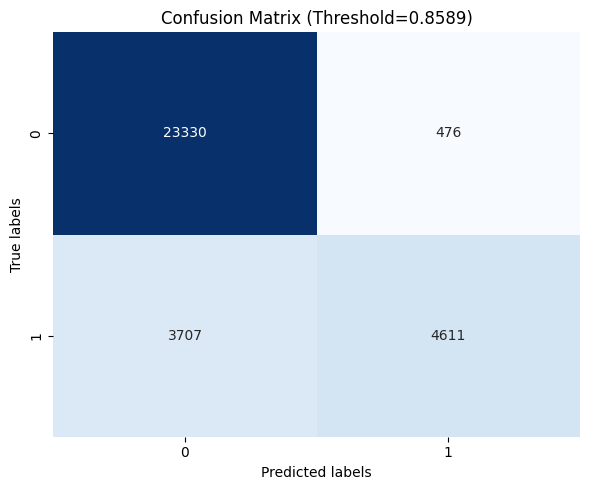

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/19 13:27:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 8161fbd725f64c3485861f418ec48123
View the run in the MLflow UI.


In [15]:
from utils.mlflow_ml_model_logger import log_classification_model
model = XGBClassifier(**xgb_params)
log_classification_model(
        model=model,
        X_train=df_train.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=df_val.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="XGBoost Tuned Model | Deep Learning | Validation Results"
    )

Starting MLflow Run: XGBoost Tuned Model | Deep Learning | Test Results (76c3de734c174f1d82ff743f0f84ab1f)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.8591089
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.8591 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8671
Validation Weighted F1-Score: 0.8548
Validation Macro F1-Score: 0.7978
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5439
Validation Precision Class 0: 0.8601
Validation Precision Class 1: 0.9048

              precision    recall  f1-score   support

           0     0.8601    0.9800    0.9162    102026
           1     0.9048    0.5439    0.6794     35648

    accuracy              

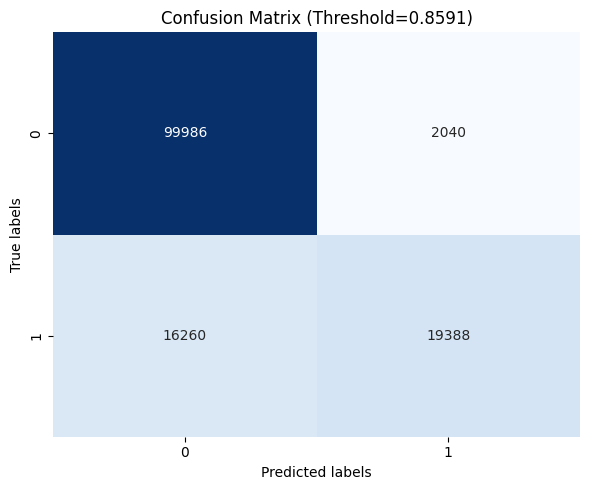

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/19 13:28:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 76c3de734c174f1d82ff743f0f84ab1f
View the run in the MLflow UI.


In [17]:
from utils.mlflow_ml_model_logger import log_classification_model
model = XGBClassifier(**xgb_params)
log_classification_model(
        model=model,
        X_train=df_train.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=df_test.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="XGBoost Tuned Model | Deep Learning | Test Results"
    )

In [18]:
catboost_params = {'bagging_temperature': 0.005488033254828606,
'border_count': 229.0, 'depth': 4, 'iterations': 600,
'l2_leaf_reg': 1.1479849355977962,
'learning_rate': 0.16975970710347035,
'logging_level': 'Silent',
'random_seed': 0,
'random_strength': 6.082491621711366,
'scale_pos_weight': 6.708005741019659,
'task_type': 'GPU'}

Starting MLflow Run: CatBoost Tuned Model | Deep Learning | Validation Results (fa0ec09bf6f742a5a4b058440e9fd25c)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9610904
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9611 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8669
Validation Weighted F1-Score: 0.8546
Validation Macro F1-Score: 0.7974
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5432
Validation Precision Class 0: 0.8599
Validation Precision Class 1: 0.9047

              precision    recall  f1-score   support

           0     0.8599    0.9800    0.9161     23806
           1     0.9047    0.5432    0.6788      8318

    accuracy       

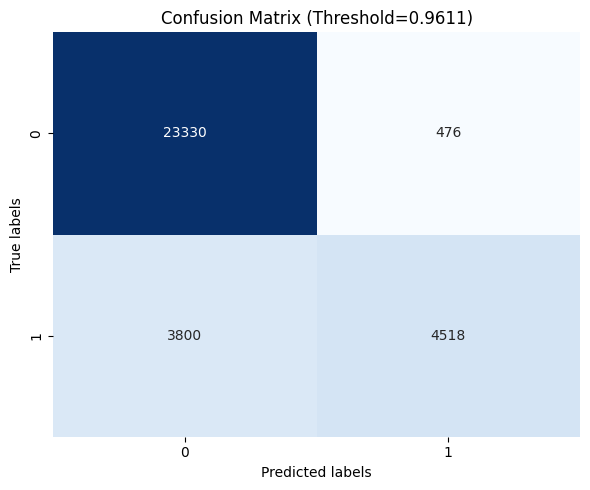

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/19 13:30:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: fa0ec09bf6f742a5a4b058440e9fd25c
View the run in the MLflow UI.


In [20]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(**catboost_params)
log_classification_model(
        model=model,
        X_train=df_train.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=df_val.drop(columns=['customer_ID']),
        y_val=y_val['target'].values,
        run_name="CatBoost Tuned Model | Deep Learning | Validation Results"
    )

Starting MLflow Run: CatBoost Tuned Model | Deep Learning | Test Results (c4f54937df474c01acf5d08eda265f7b)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9600448
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9600 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8659
Validation Weighted F1-Score: 0.8534
Validation Macro F1-Score: 0.7956
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5394
Validation Precision Class 0: 0.8589
Validation Precision Class 1: 0.9041

              precision    recall  f1-score   support

           0     0.8589    0.9800    0.9155    102026
           1     0.9041    0.5394    0.6757     35648

    accuracy             

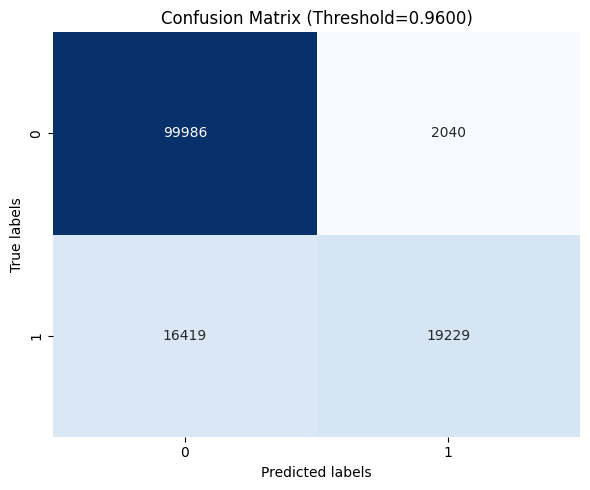

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/19 13:30:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: c4f54937df474c01acf5d08eda265f7b
View the run in the MLflow UI.


In [21]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(**catboost_params)
log_classification_model(
        model=model,
        X_train=df_train.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=df_test.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="CatBoost Tuned Model | Deep Learning | Test Results"
    )

In [ ]:
len(df_train.columns)

In [28]:
pd.DataFrame({'Feature': df_train.drop(columns = ['customer_ID']).columns, 'Importance': model.feature_importances_}).sort_values(by = ['Importance'], ascending = False).head(20)

,Feature,Importance
99,DL_15,16.700533
98,DL_14,11.283053
95,DL_11,9.290167
97,DL_13,6.764538
91,DL_7,4.948573
86,DL_2,4.271998
87,DL_3,4.164202
89,DL_5,3.571664
18,R_5,2.458732
96,DL_12,2.245624


In [20]:
#Tuning XGBoost

In [21]:
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, STATUS_FAIL, Trials, space_eval
from sklearn.metrics import recall_score, classification_report
from sklearn.base import ClassifierMixin # To ensure model has fit/predict
from typing import Dict, Any, Type, Tuple

import mlflow
from utils.threshold import find_threshold_binary_search

# Define types for clarity (optional but good practice)
DataType = Tuple[pd.DataFrame | np.ndarray, pd.Series | np.ndarray]

def tune_model_recall_constrained(
    model_cls: Type[ClassifierMixin],
    param_space: Dict[str, Any],
    train_data: DataType,
    val_data: DataType,
    primary_target_class: int,        # Class to MAXIMIZE recall for (e.g., 1)
    constraint_class: int,            # Class to apply recall CONSTRAINT on (e.g., 0)
    constraint_recall_level: float,   # Minimum recall for constraint_class (e.g., 0.98)
    max_evals: int = 50,
    mlflow_experiment_name: str = "HP Tuning Constrained Recall",
    mlflow_run_name: str = "Constrained Recall Opt Run",
    random_state: int | None = 42
) -> Dict[str, Any]:
    """
    Performs hyperparameter tuning optimizing recall for 'primary_target_class',
    subject to a minimum recall constraint on 'constraint_class'.

    Args:
        model_cls: Classifier class.
        param_space: Hyperopt search space.
        train_data: (X_train, y_train).
        val_data: (X_val, y_val).
        primary_target_class: Class index (0 or 1) whose recall we want to maximize.
        constraint_class: Class index (0 or 1) which must meet a recall threshold.
        constraint_recall_level: The minimum recall required for the constraint_class.
        max_evals: Max hyperopt trials.
        mlflow_experiment_name: MLflow experiment name.
        mlflow_run_name: MLflow parent run name.
        random_state: Random seed.

    Returns:
        Dictionary of the best hyperparameters found.
    """
    X_train, y_train = train_data
    X_val, y_val = val_data

    if primary_target_class == constraint_class:
        raise ValueError("Primary target class and constraint class cannot be the same.")

    mlflow.set_experiment(mlflow_experiment_name)

    # Define the objective function for Hyperopt
    def objective(params: Dict[str, Any]) -> Dict[str, Any]:
        # --- Cast integer params if needed (e.g., for XGBoost) ---
        if 'n_estimators' in params: params['n_estimators'] = int(params['n_estimators'])
        if 'max_depth' in params: params['max_depth'] = int(params['max_depth'])
        if 'min_child_weight' in params: params['min_child_weight'] = int(params['min_child_weight'])
        # Add other int castings as necessary based on your param_space and model_cls

        with mlflow.start_run(nested=True) as trial_run:
            start_time = time.time()
            mlflow.log_params(params)
            mlflow.log_param("primary_target_class", primary_target_class)
            mlflow.log_param("constraint_class", constraint_class)
            mlflow.log_param("constraint_recall_level", constraint_recall_level)
            mlflow.log_param("model_class", model_cls.__name__)

            metric_recall_primary = 0.0 # Metric we want to maximize
            metric_recall_constraint = 0.0 # Achieved recall for constraint class
            threshold_used = None
            loss = 1.0 # Default loss (worst case if constraint not met)
            status = STATUS_FAIL # Default status

            try:
                # Add random_state if applicable
                if 'random_state' in model_cls().get_params().keys() and random_state is not None:
                     if 'random_state' not in params:
                         params['random_state'] = random_state

                # Instantiate and train
                model = model_cls(**params)
                model.fit(X_train, y_train)

                # Predict probabilities for the *positive* class (class 1) on validation set
                if not hasattr(model, "predict_proba"):
                     raise TypeError(f"Model {model_cls.__name__} does not have predict_proba method.")
                y_pred_proba_val = model.predict_proba(X_val)[:, 1] # Prob of class 1

                # Find threshold meeting constraint on constraint_class
                threshold_used, metric_recall_constraint = find_threshold_binary_search(
                    y_true=y_val,
                    y_pred_proba=y_pred_proba_val,
                    target_recall=constraint_recall_level,
                    target_class=constraint_class
                )

                # If a valid threshold was found...
                if threshold_used is not None:
                    # Apply the threshold to get final predictions
                    y_pred_val_adjusted = (y_pred_proba_val >= threshold_used).astype(int)

                    # Calculate recall for the primary target class
                    metric_recall_primary = recall_score(
                        y_val,
                        y_pred_val_adjusted,
                        pos_label=primary_target_class,
                        average='binary',
                        zero_division=0
                    )
                    loss = 1.0 - metric_recall_primary # Minimize (1 - Recall)
                    status = STATUS_OK
                    mlflow.set_tag("constraint_met", "True")
                else:
                    # Constraint not met, this trial is considered suboptimal
                    loss = 1.0 # Assign worst loss
                    metric_recall_primary = 0.0 # No primary recall achieved under constraint
                    metric_recall_constraint = 0.0 # Report 0 constraint recall if threshold is None
                    status = STATUS_OK # Mark as OK but with worst loss, or use STATUS_FAIL
                    mlflow.set_tag("constraint_met", "False")


            except Exception as e:
                loss = 1.0 # Worst loss on error
                status = STATUS_FAIL
                mlflow.set_tag("status", "failed")
                mlflow.log_param("error_message", str(e))
                print(f"Trial FAILED with parameters: {params}\nError: {e}")
                print("-" * 30)
                # Ensure metrics are logged even on failure
                metric_recall_primary = 0.0
                metric_recall_constraint = 0.0
                threshold_used = None


            # Log metrics for this trial
            end_time = time.time()
            duration = end_time - start_time
            mlflow.log_metric(f"recall_class_{primary_target_class}", metric_recall_primary)
            mlflow.log_metric(f"recall_class_{constraint_class}", metric_recall_constraint if metric_recall_constraint is not None else 0.0) # Handle None case
            mlflow.log_metric("loss", loss)
            mlflow.log_metric("training_duration_seconds", duration)
            if threshold_used is not None:
                mlflow.log_metric("threshold_used", threshold_used)

            print(f"Trial Params: {params}")
            print(f"Constraint Met: {threshold_used is not None}")
            if threshold_used is not None:
                print(f"  Threshold: {threshold_used:.4f}")
                print(f"  Recall Class {constraint_class} (Constraint >= {constraint_recall_level:.2f}): {metric_recall_constraint:.4f}")
                print(f"  Recall Class {primary_target_class} (Maximized): {metric_recall_primary:.4f}")
            print(f"Loss (1 - Recall_{primary_target_class}): {loss:.4f}, Duration: {duration:.2f}s")
            print("-" * 30)

            return {
                'loss': loss,
                'status': status,
                'eval_time': duration,
                'params': params,
                # Store metrics achieved in this trial's result dict
                f'recall_class_{primary_target_class}': metric_recall_primary,
                f'recall_class_{constraint_class}': metric_recall_constraint if metric_recall_constraint is not None else 0.0,
                'threshold_used': threshold_used if threshold_used is not None else -1.0 # Use -1 or similar for non-None logging
            }

    # --- Hyperopt Execution ---
    trials = Trials()
    rstate = np.random.default_rng(random_state) if random_state is not None else None

    with mlflow.start_run(run_name=mlflow_run_name) as parent_run:
        print(f"Starting Hyperopt optimization for {model_cls.__name__}...")
        print(f"Maximizing recall of Class {primary_target_class}")
        print(f"Subject to Recall of Class {constraint_class} >= {constraint_recall_level:.4f}")
        print(f"Max evaluations: {max_evals}")
        print(f"Search Space: {param_space}")
        print("-" * 30)

        mlflow.log_param("model_class", model_cls.__name__)
        mlflow.log_param("primary_target_class", primary_target_class)
        mlflow.log_param("constraint_class", constraint_class)
        mlflow.log_param("constraint_recall_level", constraint_recall_level)
        mlflow.log_param("max_evals", max_evals)
        # mlflow.log_param("param_space", str(param_space)) # Careful with large spaces

        best_result = fmin(
            fn=objective,
            space=param_space,
            algo=tpe.suggest,
            max_evals=max_evals,
            trials=trials,
            rstate=rstate
        )

        # --- Post-tuning ---
        best_params_raw = best_result
        best_params = space_eval(param_space, best_params_raw)

        # Find the best trial object based on lowest loss where status is OK
        valid_trials = [t for t in trials.results if t['status'] == STATUS_OK and t['loss'] != 1.0] # Exclude constraint-not-met trials
        if not valid_trials:
             best_trial = min(trials.results, key=lambda x: x['loss'] if x['status'] == STATUS_OK else float('inf')) # Fallback if ALL failed constraint
             print("\nWARNING: No trial successfully met the recall constraint. Reporting best overall attempt.")
        else:
            best_trial = min(valid_trials, key=lambda x: x['loss'])


        print("\n" + "=" * 30)
        print("Hyperparameter Tuning Complete!")
        print(f"Best Parameters Found (raw): {best_params_raw}")
        print(f"Best Parameters Found (evaluated): {best_params}")

        if best_trial['status'] == STATUS_OK:
            best_recall_primary = best_trial[f'recall_class_{primary_target_class}']
            best_recall_constraint = best_trial[f'recall_class_{constraint_class}']
            best_threshold = best_trial['threshold_used']
            best_loss = best_trial['loss']

            print(f"\nBest Trial Results:")
            print(f"  Loss (1 - Recall Class {primary_target_class}): {best_loss:.4f}")
            print(f"  Recall Class {primary_target_class} (Maximized): {best_recall_primary:.4f}")
            print(f"  Recall Class {constraint_class} (Constraint >= {constraint_recall_level:.2f}): {best_recall_constraint:.4f}")
            print(f"  Threshold Used: {best_threshold if best_threshold != -1.0 else 'N/A (Constraint Failed)'}") # Handle logged -1

            # MLflow: Log best results to the parent run
            mlflow.log_params(best_params) # Log the actual best param values
            mlflow.log_metric(f"best_val_recall_class_{primary_target_class}", best_recall_primary)
            mlflow.log_metric(f"best_val_recall_class_{constraint_class}", best_recall_constraint)
            if best_threshold != -1.0: # Log threshold if valid
                mlflow.log_metric("best_threshold_used", best_threshold)
            mlflow.log_metric("best_val_loss", best_loss)
            mlflow.set_tag("best_params", str(best_params))
            mlflow.set_tag("constraint_status_for_best", "Met" if best_threshold != -1.0 else "Not Met")
        else:
            print("\nNo successful trial completed or constraint met.")
            mlflow.set_tag("status", "tuning_failed_or_constraint_unmet")

        print("=" * 30)

    return best_params

In [22]:
from xgboost import XGBClassifier

model_to_tune = XGBClassifier

xgb_param_space = {
    # --- Tree Booster Parameters ---
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50), # From 100 to 1000, steps of 50
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.3)), # Range 0.005 to 0.3 (log scale)
    'max_depth': hp.quniform('max_depth', 3, 7, 1), # Integer values from 3 to 7
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1), # Integer values from 1 to 10
    'gamma': hp.uniform('gamma', 0.0, 1.0), # Range 0.0 to 1.0
    'subsample': hp.uniform('subsample', 0.5, 1.0), # Range 0.5 to 1.0 (exclusive of 1.0?) -> check docs. XGBoost usually allows 1.0
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.5, 1.0),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.5, 1.0),
    'reg_alpha': hp.loguniform('reg_alpha', np.log(0.001), np.log(1.0)), # Range 0.001 to 1.0 (log scale)
    'reg_lambda': hp.uniform('reg_lambda', 0.1, 10.0), # Range 0.1 to 10.0
    'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 20), # Example: search range from 1 (no reweighting) up to 20. ADJUST THIS.
    'random_state': 0,
    'tree_method': 'hist', # Use 'hist' for faster training on large datasets
    'device': 'cuda'
}

In [23]:
# --- Tuning Configuration ---
PRIMARY_CLASS = 1 # Maximize recall for the minority class 1
CONSTRAINT_CLASS = 0 # Ensure recall for majority class 0 is high
CONSTRAINT_RECALL = 0.98 # Target recall for class 0
MAX_EVALUATIONS = 50 # Increase for better results

best_hyperparameters = tune_model_recall_constrained(
    model_cls=model_to_tune,
    param_space=xgb_param_space,
    train_data=(df_train.drop(columns=['customer_ID']), y_train['target'].values),
    val_data=(df_val.drop(columns=['customer_ID']), y_val['target'].values),
    primary_target_class=PRIMARY_CLASS,
    constraint_class=CONSTRAINT_CLASS,
    constraint_recall_level=CONSTRAINT_RECALL,
    max_evals=MAX_EVALUATIONS,
    mlflow_experiment_name="HP Tuning | DL + DF",
    mlflow_run_name=f"Tuning {model_to_tune.__name__}",
    random_state=42
)

2025/04/19 13:02:05 INFO mlflow.tracking.fluent: Experiment with name 'HP Tuning | DL + DF' does not exist. Creating a new experiment.


Starting Hyperopt optimization for XGBClassifier...
Maximizing recall of Class 1
Subject to Recall of Class 0 >= 0.9800
Max evaluations: 50
Search Space: {'n_estimators': <hyperopt.pyll.base.Apply object at 0x000001EBC41D7490>, 'learning_rate': <hyperopt.pyll.base.Apply object at 0x000001EBC41D7190>, 'max_depth': <hyperopt.pyll.base.Apply object at 0x000001EBC41D6FE0>, 'min_child_weight': <hyperopt.pyll.base.Apply object at 0x000001EBC41D4A30>, 'gamma': <hyperopt.pyll.base.Apply object at 0x000001EBC41D48B0>, 'subsample': <hyperopt.pyll.base.Apply object at 0x000001EBC41D4580>, 'colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000001EBC41D43D0>, 'colsample_bylevel': <hyperopt.pyll.base.Apply object at 0x000001EBC41D7100>, 'colsample_bynode': <hyperopt.pyll.base.Apply object at 0x000001EBC41D6EC0>, 'reg_alpha': <hyperopt.pyll.base.Apply object at 0x000001EBC41D5660>, 'reg_lambda': <hyperopt.pyll.base.Apply object at 0x000001EBC41D4F70>, 'scale_pos_weight': <hyperopt.pyll.base.Ap

In [24]:
best_hyperparameters

{'colsample_bylevel': 0.7688920106904573,
 'colsample_bynode': 0.6938188360051636,
 'colsample_bytree': 0.8028247433087468,
 'device': 'cuda',
 'gamma': 0.5089129645696884,
 'learning_rate': 0.020625416768734663,
 'max_depth': 6.0,
 'min_child_weight': 6.0,
 'n_estimators': 950.0,
 'random_state': 0,
 'reg_alpha': 0.7317139587707565,
 'reg_lambda': 2.7564150617343217,
 'scale_pos_weight': 1.7839467900473416,
 'subsample': 0.51735171792841,
 'tree_method': 'hist'}

In [25]:
#tuning catboost

In [26]:
from catboost import CatBoostClassifier

model_to_tune = CatBoostClassifier

catboost_param_space = {
    # --- Core Parameters ---
    'iterations': hp.quniform('iterations', 100, 1000, 50),  # Number of boosting iterations
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.3)),  # Learning rate
    'depth': hp.quniform('depth', 3, 10, 1),  # Depth of the tree

    # --- Regularization Parameters ---
    'l2_leaf_reg': hp.loguniform('l2_leaf_reg', np.log(1), np.log(10)),  # L2 regularization
    'border_count': hp.quniform('border_count', 32, 255, 1),  # Number of splits for numerical features

    # --- Sampling Parameters ---
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),  # Controls the sampling ratio
    'random_strength': hp.uniform('random_strength', 0, 10),  # Randomness in scoring splits

    # --- Other Parameters ---
    'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 20),  # Balancing positive and negative classes
    'random_seed': 0,  # Fixed random seed for reproducibility
    'task_type': 'GPU',  # Use GPU for training
    'logging_level': 'Silent'  # Suppress training logs
}

In [28]:
# --- Tuning Configuration ---
PRIMARY_CLASS = 1 # Maximize recall for the minority class 1
CONSTRAINT_CLASS = 0 # Ensure recall for majority class 0 is high
CONSTRAINT_RECALL = 0.98 # Target recall for class 0
MAX_EVALUATIONS = 50 # Increase for better results

best_hyperparameters_cb = tune_model_recall_constrained(
    model_cls=model_to_tune,
    param_space=catboost_param_space,
    train_data=(df_train.drop(columns=['customer_ID']), y_train['target'].values),
    val_data=(df_val.drop(columns=['customer_ID']), y_val['target'].values),
    primary_target_class=PRIMARY_CLASS,
    constraint_class=CONSTRAINT_CLASS,
    constraint_recall_level=CONSTRAINT_RECALL,
    max_evals=MAX_EVALUATIONS,
    mlflow_experiment_name="HP Tuning | DL + DF | Catboost",
    mlflow_run_name=f"Tuning {model_to_tune.__name__}",
    random_state=42
)

2025/04/19 13:11:19 INFO mlflow.tracking.fluent: Experiment with name 'HP Tuning | DL + DF | Catboost' does not exist. Creating a new experiment.


Starting Hyperopt optimization for CatBoostClassifier...
Maximizing recall of Class 1
Subject to Recall of Class 0 >= 0.9800
Max evaluations: 50
Search Space: {'iterations': <hyperopt.pyll.base.Apply object at 0x000001EC194B8130>, 'learning_rate': <hyperopt.pyll.base.Apply object at 0x000001EC194B8520>, 'depth': <hyperopt.pyll.base.Apply object at 0x000001EC194B84F0>, 'l2_leaf_reg': <hyperopt.pyll.base.Apply object at 0x000001EC194BA590>, 'border_count': <hyperopt.pyll.base.Apply object at 0x000001EC194BA920>, 'bagging_temperature': <hyperopt.pyll.base.Apply object at 0x000001EC194B9B10>, 'random_strength': <hyperopt.pyll.base.Apply object at 0x000001EC194B9300>, 'scale_pos_weight': <hyperopt.pyll.base.Apply object at 0x000001EC194B91B0>, 'random_seed': 0, 'task_type': 'GPU', 'logging_level': 'Silent'}
------------------------------
Target Recall: >= 0.9800 for Class 0                  
Threshold found by Binary Search: 0.9833300           
Achieved Recall at Threshold: 0.9800         